<a href="https://colab.research.google.com/github/srinivasan-ES/ML/blob/main/Loan_Eligibility_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sb
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [12]:
loan_datasets = pd.read_csv('/content/loan_dataset.csv')

In [11]:
loan_datasets.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
loan_datasets.shape

(614, 13)

In [14]:
loan_datasets.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [18]:
loan_datasets= loan_datasets.dropna()

In [19]:
loan_datasets.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [23]:
loan_datasets= loan_datasets.replace({'Loan_Status':{'N':0,'Y':1}})

/tmp/ipython-input-3639237916.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_datasets= loan_datasets.replace({'Loan_Status':{'N':0,'Y':1}})


In [27]:
loan_datasets= loan_datasets.replace({'Dependents':{'3+':4}})

In [30]:
loan_datasets['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


In [24]:
X = loan_datasets.drop(columns='Loan_Status' , axis =1)
Y = loan_datasets['Loan_Status']
print(X)
print(Y)

      Loan_ID  Gender Married  ... Loan_Amount_Term Credit_History Property_Area
1    LP001003    Male     Yes  ...            360.0            1.0         Rural
2    LP001005    Male     Yes  ...            360.0            1.0         Urban
3    LP001006    Male     Yes  ...            360.0            1.0         Urban
4    LP001008    Male      No  ...            360.0            1.0         Urban
5    LP001011    Male     Yes  ...            360.0            1.0         Urban
..        ...     ...     ...  ...              ...            ...           ...
609  LP002978  Female      No  ...            360.0            1.0         Rural
610  LP002979    Male     Yes  ...            180.0            1.0         Rural
611  LP002983    Male     Yes  ...            360.0            1.0         Urban
612  LP002984    Male     Yes  ...            360.0            1.0         Urban
613  LP002990  Female      No  ...            360.0            0.0     Semiurban

[480 rows x 12 columns]
1  

In [32]:
loan_datasets= loan_datasets.replace({'Gender':{'Male':0,'Female':1}})

/tmp/ipython-input-1787540778.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_datasets= loan_datasets.replace({'Gender':{'Male':0,'Female':1}})


In [33]:
loan_datasets= loan_datasets.replace({'Married':{'Yes':1,'No':0}})

/tmp/ipython-input-211919523.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_datasets= loan_datasets.replace({'Married':{'Yes':1,'No':0}})


In [34]:
loan_datasets= loan_datasets.replace({'Self_Employed':{'Yes':1,'No':0},'Property_Area' : {'Rural':0,'Semiurban':1,'Urban':2}})

/tmp/ipython-input-3274507809.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_datasets= loan_datasets.replace({'Self_Employed':{'Yes':1,'No':0},'Property_Area' : {'Rural':0,'Semiurban':1,'Urban':2}})


In [35]:
loan_datasets= loan_datasets.replace({'Education':{'Graduate':1,'Not Graduate':0}})

/tmp/ipython-input-247781858.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_datasets= loan_datasets.replace({'Education':{'Graduate':1,'Not Graduate':0}})


In [36]:
loan_datasets.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


<Axes: xlabel='Education', ylabel='count'>

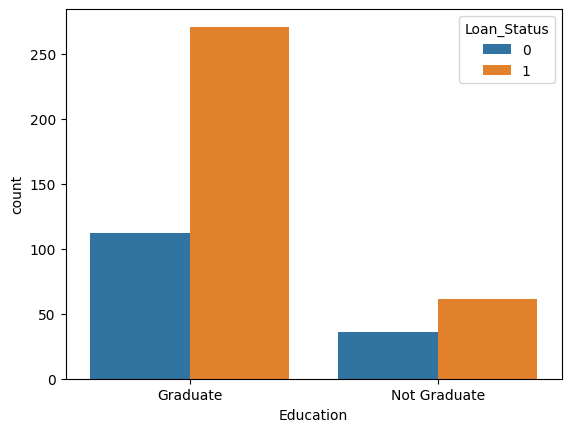

In [31]:
sb.countplot(x='Education',hue='Loan_Status',data=loan_datasets )

In [38]:
X = loan_datasets.drop(columns=['Loan_ID','Loan_Status'] , axis =1)
Y = loan_datasets['Loan_Status']
print(X)
print(Y)

     Gender  Married  ... Credit_History  Property_Area
1         0        1  ...            1.0              0
2         0        1  ...            1.0              2
3         0        1  ...            1.0              2
4         0        0  ...            1.0              2
5         0        1  ...            1.0              2
..      ...      ...  ...            ...            ...
609       1        0  ...            1.0              0
610       0        1  ...            1.0              0
611       0        1  ...            1.0              2
612       0        1  ...            1.0              2
613       1        0  ...            0.0              1

[480 rows x 11 columns]
1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [44]:
X_train , X_test ,Y_train,Y_test = train_test_split(X,Y, test_size=0.2 , random_state = 2 , stratify = Y)

In [ ]:
new_model = SVC(kernel ="linear")
new_model.fit(X_train,Y_train)

In [42]:
c =new_model.predict(X_train)
accurac = accuracy_score(c,Y_train)

In [43]:
print(accurac)

0.7476851851851852
